In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Set styles
plt.style.use('ggplot')
sns.set_palette("husl")

# Upload the dataset
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

# Preview dataset
display(HTML("<h3>🎧 Preview of Spotify Dataset</h3>"))
display(df.head())

Saving spotify.csv to spotify.csv


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [3]:
# ===== Q1: Check null values and duplicates, then clean =====
pretty_print = lambda title, obj, is_df=False: display(HTML(f"<h3 style='color:#2B547E;'>{title}</h3>")) or (display(obj.style.background_gradient(cmap='Blues')) if is_df else display(obj.to_frame().style.background_gradient(cmap='Greens')))

# Null values
pretty_print("🔍 Null Values in Dataset", df.isnull().sum())

# Drop rows with any nulls (if found)
df.dropna(inplace=True)

# Check for duplicates
duplicates = df.duplicated().sum()
pretty_print("📌 Number of Duplicate Rows", pd.Series(duplicates))

# Drop duplicates
df.drop_duplicates(inplace=True)

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


,0
0,27


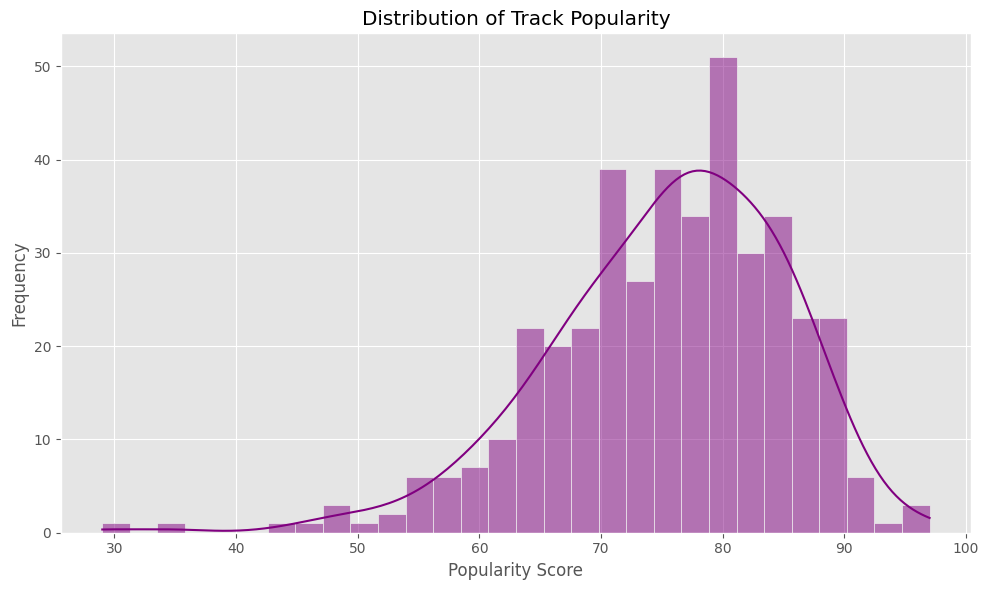

In [4]:
# ===== Q2: Distribution of popularity =====
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='purple')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

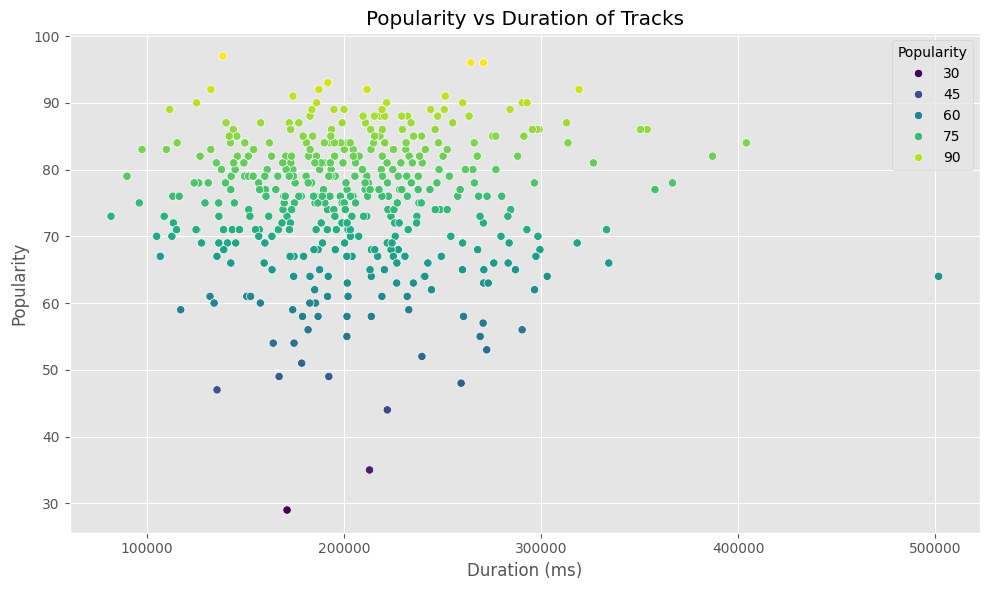

In [5]:
# ===== Q3: Popularity vs Duration =====
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', hue='Popularity', palette='viridis')
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

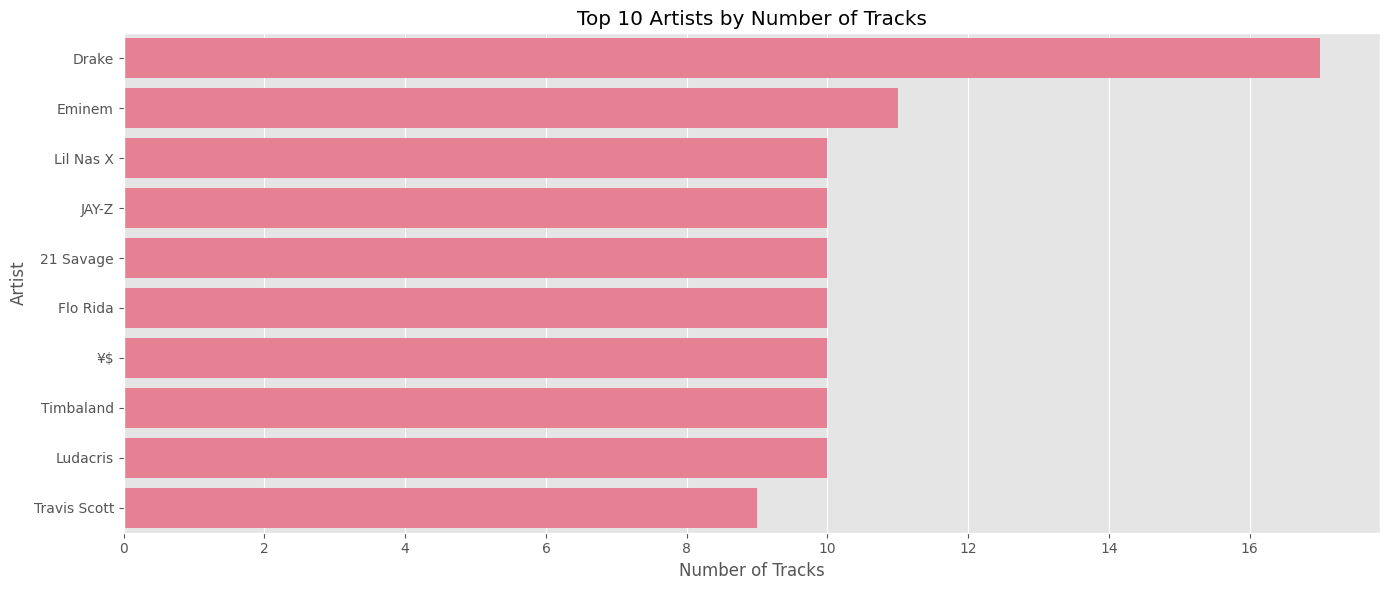

In [6]:
# ===== Q4: Artist with most tracks =====
plt.figure(figsize=(14,6))
top_artists = df['Artist'].value_counts()
sns.countplot(data=df, y='Artist', order=top_artists[:10].index)
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [7]:
# ===== Q5: Top 5 Least Popular Tracks =====
q5 = df.sort_values(by='Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]
pretty_print("😢 Top 5 Least Popular Tracks", q5, is_df=True)

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [8]:
# ===== Q6: Avg popularity of Top 5 Most Frequent Artists =====
top5_artists = df['Artist'].value_counts().head(5).index
avg_pop = df[df['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False).round(2)
pretty_print("🔥 Average Popularity of Top 5 Artists", avg_pop)

,Popularity
Artist,
21 Savage,83.800000
Eminem,83.640000
Drake,82.880000
JAY-Z,77.900000
Lil Nas X,75.900000


In [9]:
# ===== Q7: Most popular track of Top 5 Artists =====
popular_tracks = df[df['Artist'].isin(top5_artists)]
top_tracks = popular_tracks.sort_values('Popularity', ascending=False).drop_duplicates('Artist')[['Artist', 'Track Name', 'Popularity']]
pretty_print("🌟 Most Popular Track of Top 5 Artists", top_tracks, is_df=True)

,Artist,Track Name,Popularity
70,21 Savage,redrum,96
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
100,JAY-Z,Ni**as In Paris,86
312,Lil Nas X,THATS WHAT I WANT,81


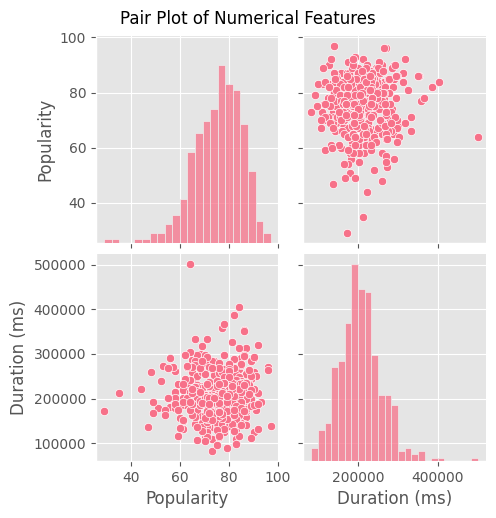

In [10]:
# ===== Q8: Pairplot of numerical relationships =====
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

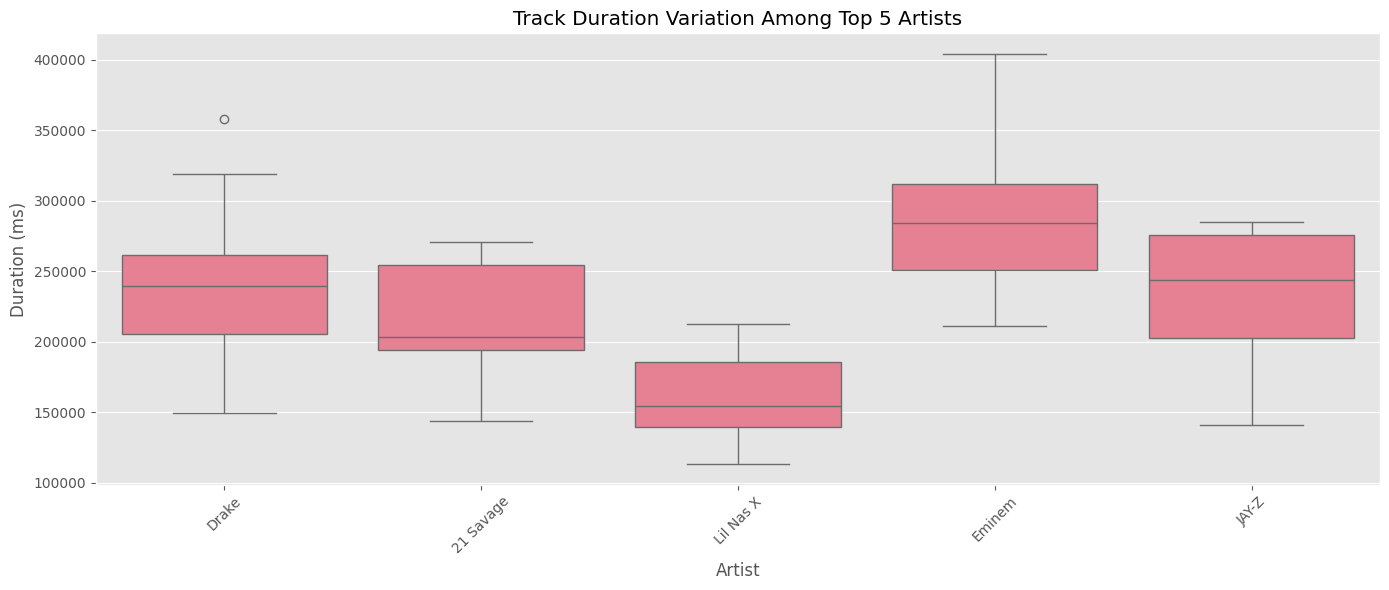

In [11]:
# ===== Q9: Duration variation across artists =====
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['Artist'].isin(top5_artists)], x='Artist', y='Duration (ms)')
plt.title('Track Duration Variation Among Top 5 Artists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

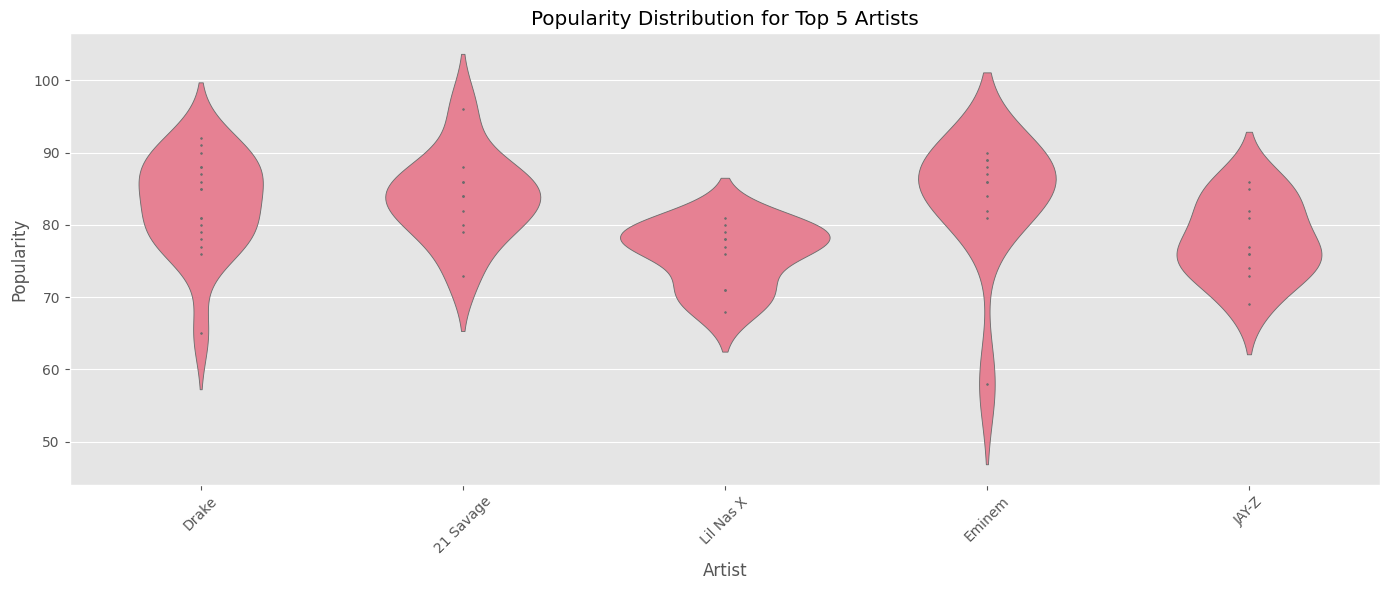

In [12]:
# ===== Q10: Popularity distribution across artists =====
plt.figure(figsize=(14,6))
sns.violinplot(data=df[df['Artist'].isin(top5_artists)], x='Artist', y='Popularity', inner='point')
plt.title('Popularity Distribution for Top 5 Artists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()